In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Load the games and reviews datasets
games_df = pd.read_json('games.jl', lines=True)
reviews_df = pd.read_json('reviews.jl', lines=True)

**Analysis of the Games Dataset**

Finding the percentage of missing values in games dataset

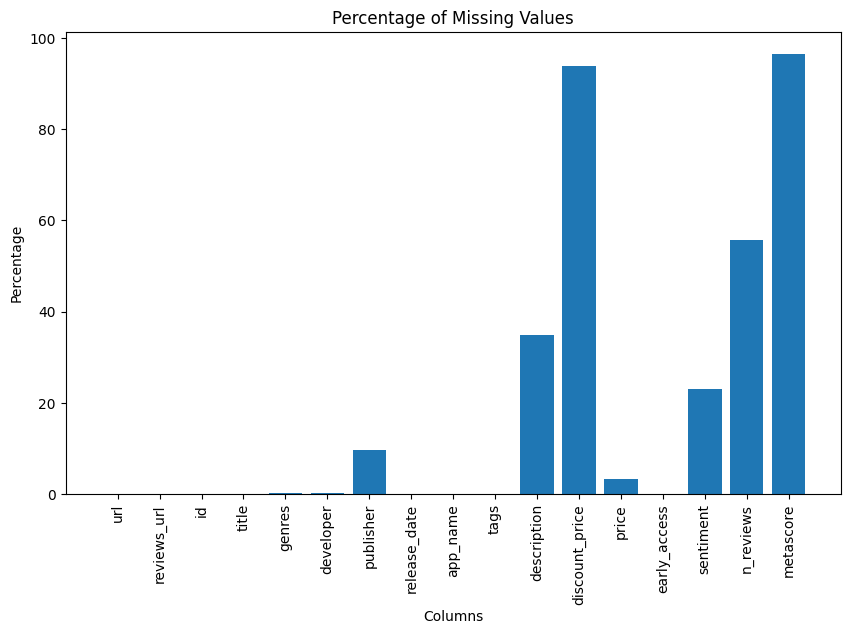

In [4]:
missing_values = games_df.isna().sum()
missing_percent = round((missing_values / len(games_df)) * 100, 2)

plt.figure(figsize=(10, 6))
plt.bar(missing_percent.index, missing_percent.values)
plt.title('Percentage of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

Dropping the columns which has significant amount of missing values and also which are not relevant for the analysis

In [5]:
games_df_sm = games_df.drop(columns=['metascore','n_reviews','sentiment','discount_price','description','publisher'])
games_df_sm.columnst

Index(['url', 'reviews_url', 'id', 'title', 'genres', 'developer',
       'release_date', 'app_name', 'tags', 'price', 'early_access'],
      dtype='object')

Plotting the game distribution by the different types of Genre

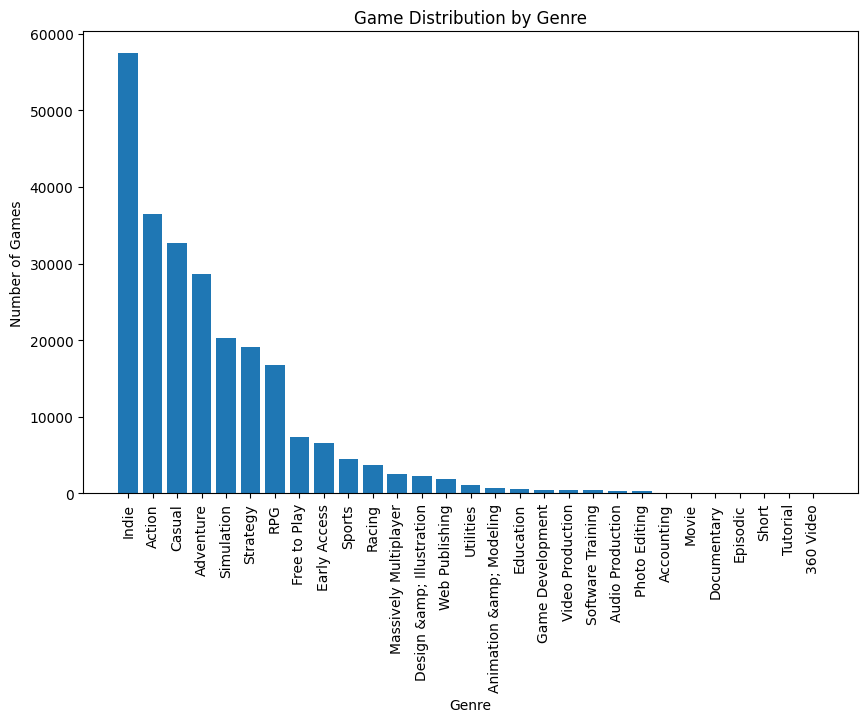

In [6]:
# Drop rows with missing values in the genres column
games_df_sm_dp_genres = games_df_sm.dropna(subset=['genres'])

# Create a new dataframe with each genre as a separate row
genre_df = games_df_sm_dp_genres.explode('genres')

# Get count of games by genre
genre_count = genre_df['genres'].value_counts()

# Plot game distribution by genre
plt.figure(figsize=(10, 6))
plt.bar(genre_count.index, genre_count.values)
plt.title('Game Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()


Plotting the price distribution vs the number of games. The number of games is log scaled for better visualization.

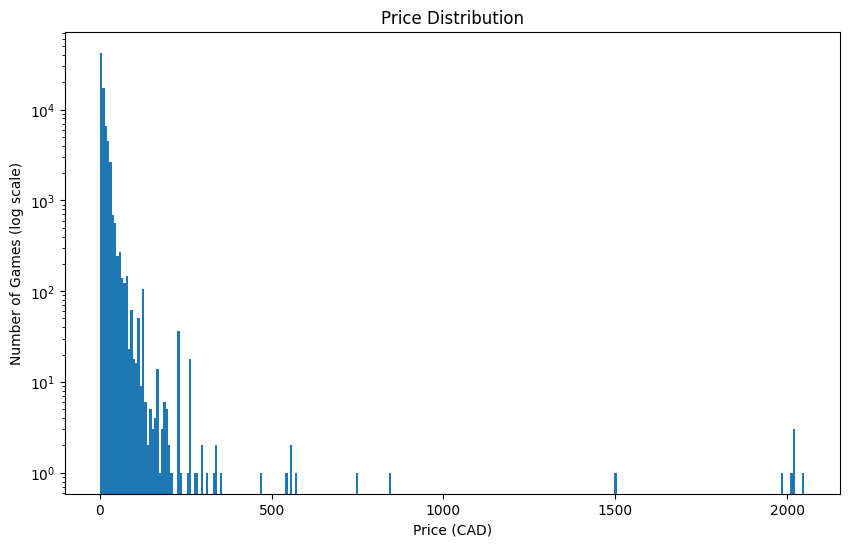

In [8]:
# Drop rows with missing values in the price column
games_df_sm_dp_price = games_df_sm.dropna(subset=['price'])

# Extract the numeric values from the price column
price_df = games_df_sm_dp_price['price'].str.extract(r'(\d+\.?\d*)').astype(float)

# Plot price distribution
plt.figure(figsize=(10,6))
plt.hist(price_df, bins=300)
plt.title('Price Distribution')
plt.xlabel('Price (CAD)')
plt.ylabel('Number of Games (log scale)')
plt.yscale('log')
plt.show()

Plotting the price distribution vs genre using a violin graph. The price distribution is log scaled for better visualization.

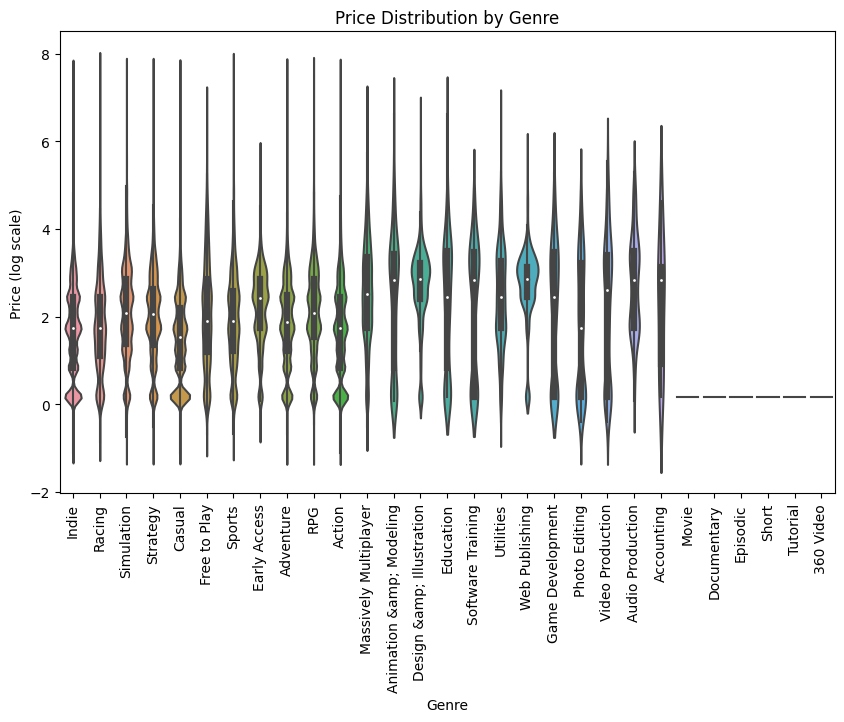

In [9]:
# Preprocess the data
games_df_sm_cp = games_df_sm.copy()
games_df_sm_cp = games_df_sm_cp.dropna(subset=['genres','price'])

games_df_sm_cp['priceVal'] = games_df_sm_cp['price'].str.extract(r'(\d+\.?\d*)').astype(float)
games_df_sm_cp['priceValLog'] = games_df_sm_cp['priceVal'].apply(lambda x: np.log(x))  # take log of price values
games_df_sm_cp = games_df_sm_cp.explode('genres')

# Violin plot of price distribution by genre
plt.figure(figsize=(10,6))
sns.violinplot(x=games_df_sm_cp['genres'], y=games_df_sm_cp['priceValLog'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Price (log scale)')
plt.title('Price Distribution by Genre')
plt.show()

**Analysis of the Review Dataset**

Finding the percentage of missing values in review dataset

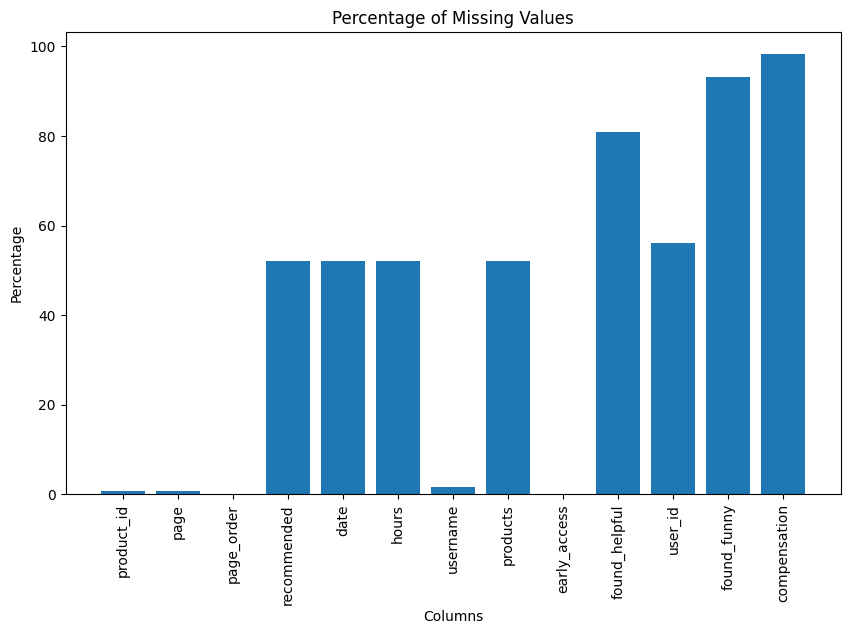

In [11]:
missing_values = reviews_df.isna().sum()
missing_percent = round((missing_values / len(reviews_df)) * 100, 2)

plt.figure(figsize=(10,6))
plt.bar(missing_percent.index, missing_percent.values)
plt.title('Percentage of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

Dropping the columns which has significant amount of missing values and also which are not relevant for the analysis

In [12]:
reviews_df_sm = reviews_df.drop(columns=['compensation','found_funny','found_helpful','products','hours','page','page_order'])
reviews_df_sm.columns

Index(['product_id', 'recommended', 'date', 'username', 'early_access',
       'user_id'],
      dtype='object')

Plotting the count of the recommended vs not recommended game reviews in the dataset 

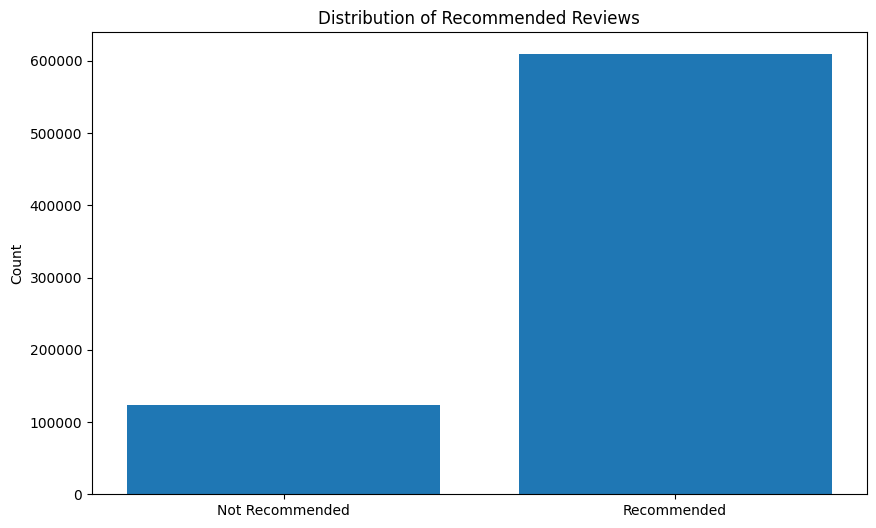

In [13]:
recommended_counts = reviews_df_sm['recommended'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(recommended_counts.index, recommended_counts.values)
plt.xticks([0, 1], ['Not Recommended', 'Recommended'])
plt.ylabel('Count')
plt.title('Distribution of Recommended Reviews')
plt.show()

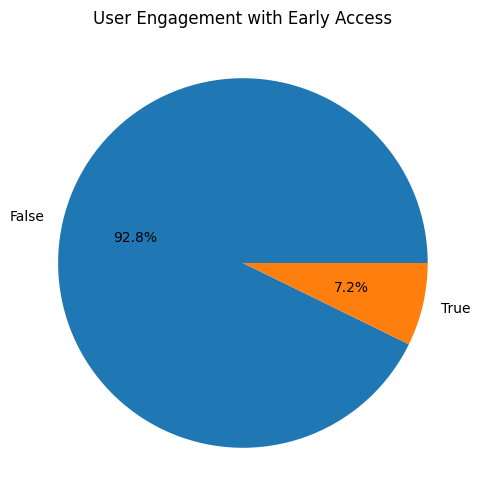

In [15]:
early_access_counts = reviews_df_sm['early_access'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(early_access_counts.values, labels=['False', 'True'], autopct='%1.1f%%')
plt.title('User Engagement with Early Access')
plt.show()

Plotting the review distribution over time to understand the growth trend. Number of reviews is log scaled for better visualization

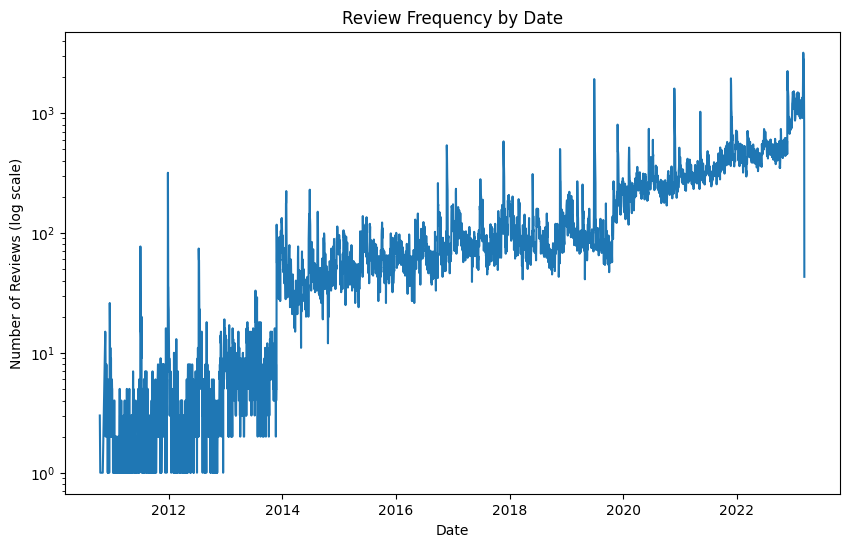

In [16]:
reviews_df_sm['date'] = pd.to_datetime(reviews_df_sm['date'], errors='coerce')
# reviews_df_sm['date'] = reviews_df_sm['date'].fillna(reviews_df_sm['date'].min()) # Filling with min date instead of dropping
reviews_df_date = reviews_df_sm.dropna(subset=['date'])

reviews_by_date = reviews_df_date.groupby('date').size().reset_index(name='counts')
plt.figure(figsize=(10,6))
plt.plot(reviews_by_date['date'], reviews_by_date['counts'])
plt.title('Review Frequency by Date')
plt.xlabel('Date')
plt.ylabel('Number of Reviews (log scale)')
plt.yscale('log')
plt.show()

Plotting histogram of the number of products vs number of reviews. Number of reviews is log scaled for better visualization

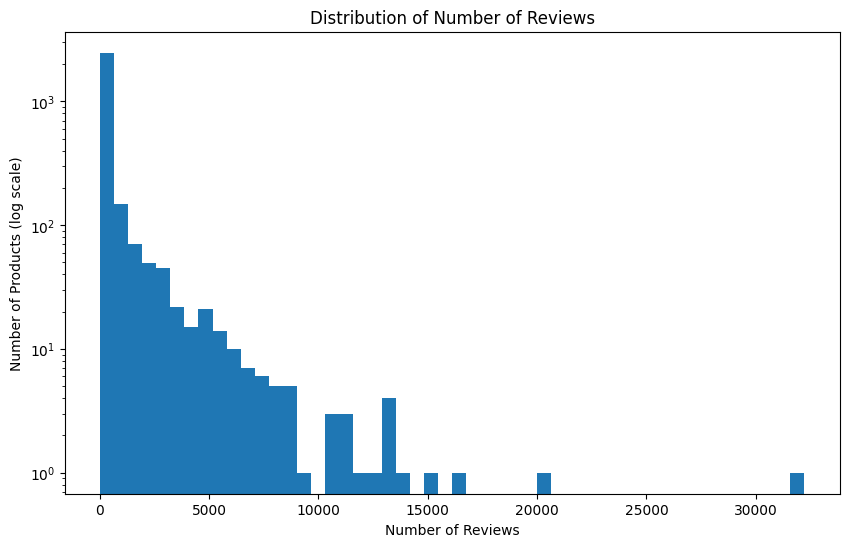

In [18]:
reviews_per_product = reviews_df_sm['product_id'].value_counts()

# Plot the distribution of reviews and products
plt.figure(figsize=(10,6))
plt.hist(reviews_per_product, bins=50)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products (log scale)')
plt.yscale('log')
plt.title('Distribution of Number of Reviews')
plt.show()


# This code plots reviews per product but not that useful
# reviews_per_product.plot(kind='bar', figsize=(10,5))
# plt.yscale('log')
# plt.xlabel('Product ID')
# plt.ylabel('Number of Reviews')
# plt.title('Number of Reviews per Product')
# plt.show()

**Merging the two datasets i.e. games and their reviews using the product_id of the games**

In [19]:
merged = pd.merge(reviews_df_sm, games_df_sm, left_on='product_id', right_on='id')
merged.columns

Index(['product_id', 'recommended', 'date', 'username', 'early_access_x',
       'user_id', 'url', 'reviews_url', 'id', 'title', 'genres', 'developer',
       'release_date', 'app_name', 'tags', 'price', 'early_access_y'],
      dtype='object')

Plotting the top 10 most reviewed games

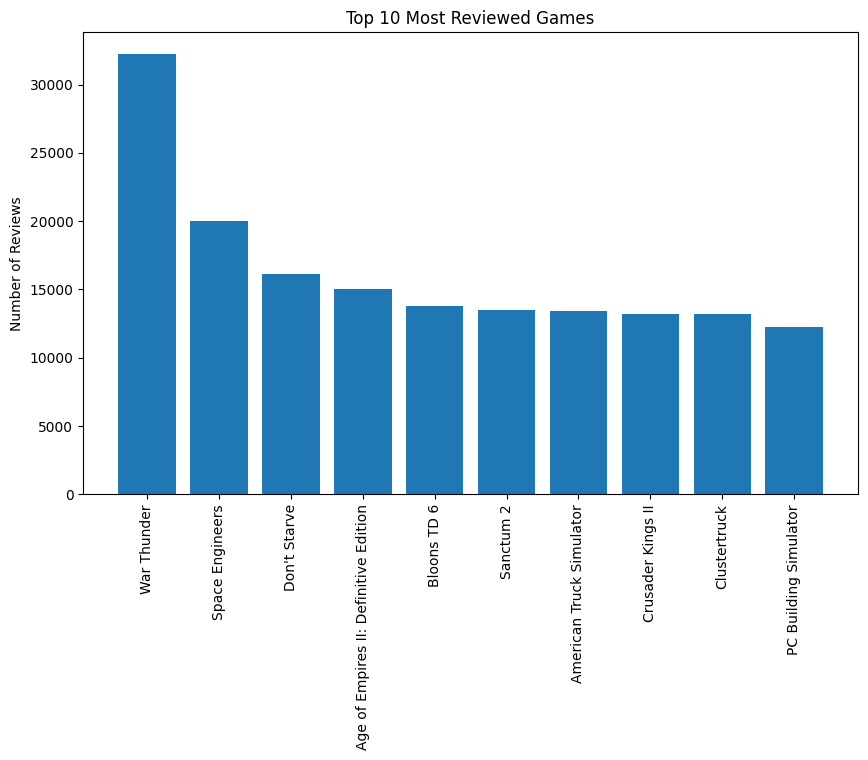

In [21]:
# plot the top 10 most reviewed games
most_reviewed = merged['title'].value_counts()[:10]
plt.figure(figsize=(10,6))
plt.bar(most_reviewed.index, most_reviewed.values)
plt.xticks(rotation=90)
plt.ylabel('Number of Reviews')
plt.title('Top 10 Most Reviewed Games')
plt.show()

Plotting the top 10 most recommended games

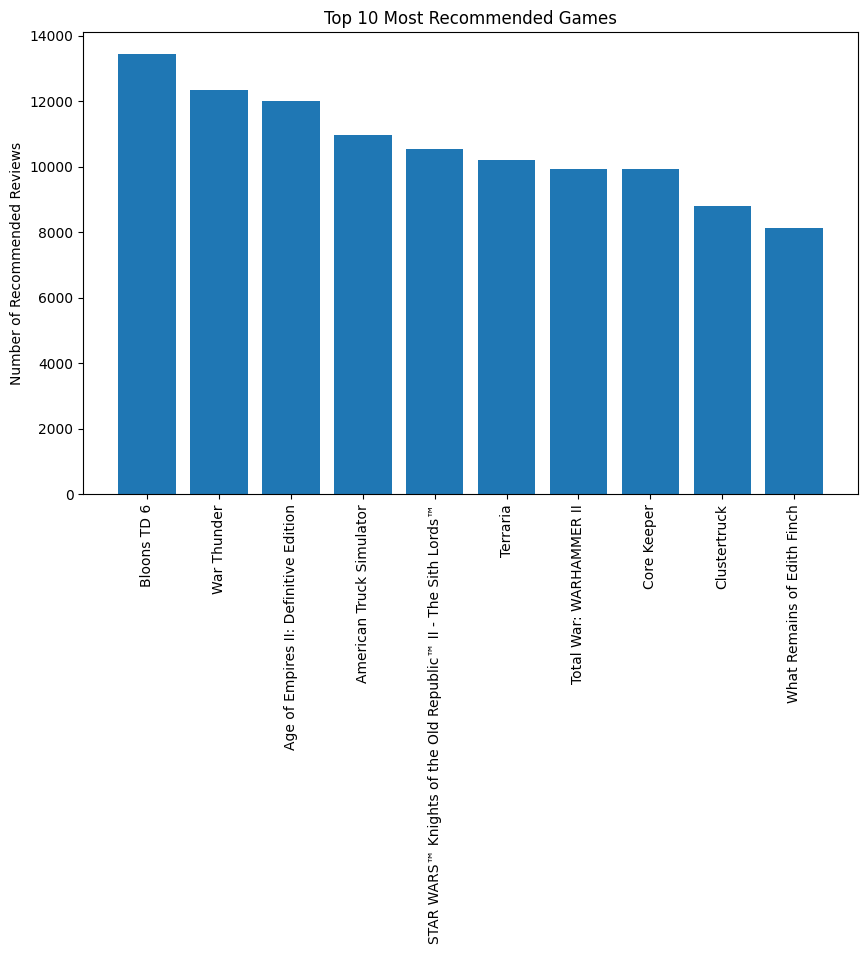

In [22]:
# count the number of recommended reviews for each game
recommended_counts = merged[merged['recommended'] == 1].groupby('title')['recommended'].count()

# get the top 10 games with the most recommended reviews
top10 = recommended_counts.sort_values(ascending=False)[:10]

# plot the results
plt.figure(figsize=(10,6))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=90)
plt.title('Top 10 Most Recommended Games')
plt.ylabel('Number of Recommended Reviews')
plt.show()

Plotting the top 10 not recommended games

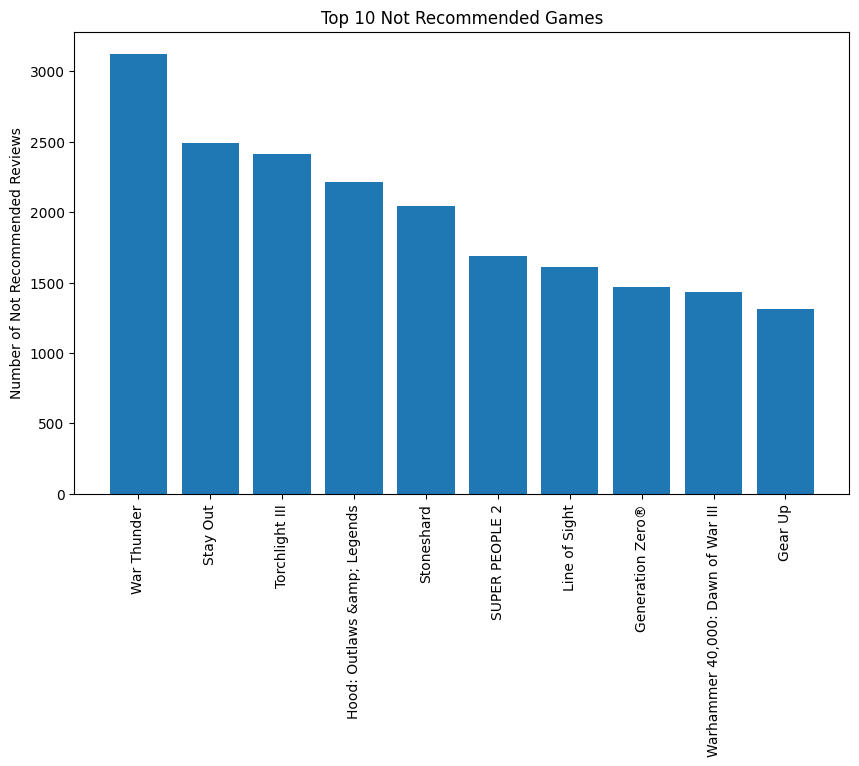

In [23]:
# count the number of not recommended reviews for each game
not_recommended_counts = merged[merged['recommended'] == 0].groupby('title')['recommended'].count()

top10 = not_recommended_counts.sort_values(ascending=False)[:10]

# plot the results
plt.figure(figsize=(10,6))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=90)
plt.title('Top 10 Not Recommended Games')
plt.ylabel('Number of Not Recommended Reviews')
plt.show()

Checking if any of the columns in the dataset are correlated to each other

/var/folders/hj/tjclftn95615xh644w3kmdsm0000gn/T/ipykernel_99734/2384674341.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged.corr()


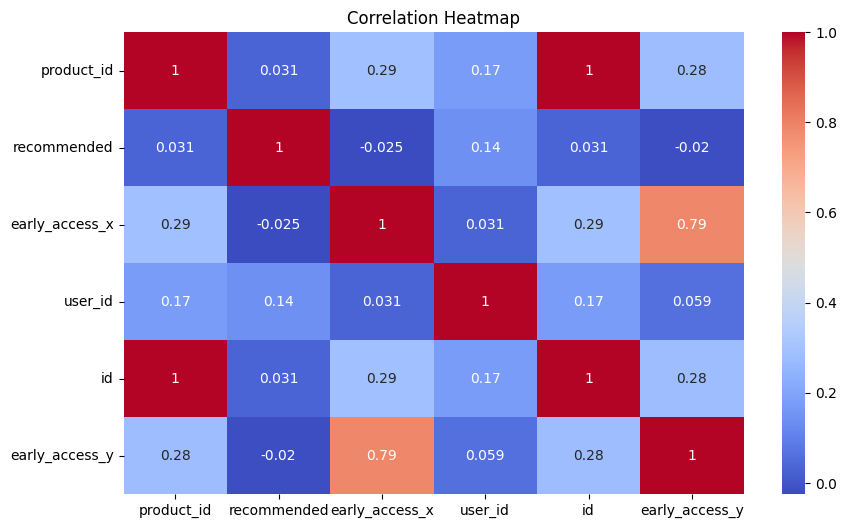

In [24]:
# Create correlation matrix
corr_matrix = merged.corr()

# Plot correlation heatmap
plt.figure(figsize=(10,6))
plt.title('Correlation Heatmap')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()